<a href="https://colab.research.google.com/github/sensei-jirving/mywind/blob/master/Example/Intro_to_Linear_Regression_%2B_Coefficients_05_10_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Linear to Logistic Regression Coefficients

- UPDATED 05/10/22
- James M. Irving, Ph.D.

## Learning Objectives



- To review how linear regression predicts a continuous value.
- To understand what coefficients are and how they are used to calcualte the target.

- Lesson Duration:
    - ~10 mins

# Predicting the Price of a Home Using Linear Regression

<img src="https://github.com/jirvingphd/from-linear-to-logistic-regression-brief-intro/blob/main/images/istock24011682medium_1200xx1697-955-0-88.jpg?raw=1" width=60% alt="Source: https://images.app.goo.gl/oJoMSGU8LGgDjkA76">

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
## Customization Options
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
plt.style.use('seaborn-talk')
plt.rcParams['figure.facecolor']='white'

In [ ]:
## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import (r2_score, plot_confusion_matrix,
                             classification_report)

## Customized Options
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
plt.style.use('seaborn-talk')

In [ ]:
## Load in the King's County housing dataset and display the head and info
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv")
display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,...,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


None

In [ ]:
## FILTERING EXTREME VALUES FOR DEMONSTRATION PURPOSES
df = df.loc[( df['bedrooms'] <8) & (df['price'] < 2_000_000) & df['bathrooms']>0]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,...,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,"360,000.0000",3,2.5000,1530,1131,3.0000,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509
21609,6600060120,20150223T000000,"400,000.0000",4,2.5000,2310,5813,2.0000,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200
21610,1523300141,20140623T000000,"402,101.0000",2,0.7500,1020,1350,2.0000,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007
21611,291310100,20150116T000000,"400,000.0000",3,2.5000,1600,2388,2.0000,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287


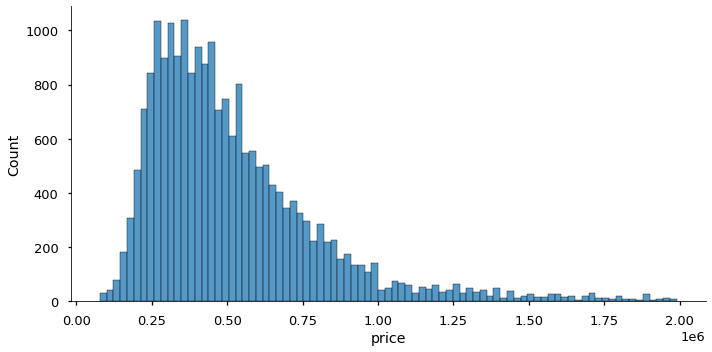

In [ ]:
## Visualize the distribution of house prices (using seaborn!)
sns.displot(df['price'],aspect=2);

## ~~🕹Activity:~~ Visualizing Our Features vs Our Target

- We want to determine how features of a home influence its sale price. 
- Specifically, we will be using:
    - `sqft_living`:Square-Footage of all Living Areas
    - `bedrooms`: # of Bedrooms
    - `bathrooms`: # of Bathrooms

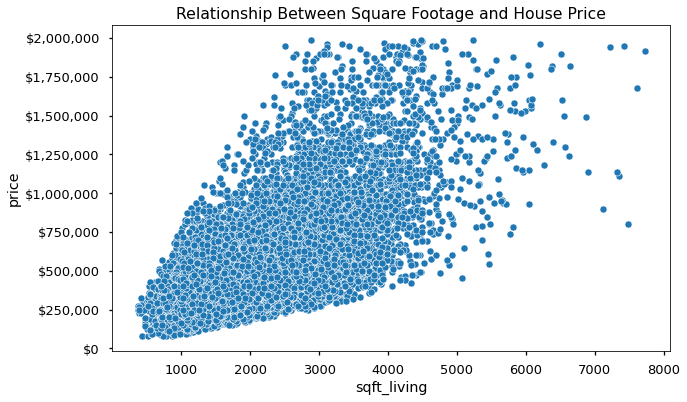

In [ ]:
from matplotlib.ticker import StrMethodFormatter
## Plot a scatter plot of sqft-living vs price
ax = sns.scatterplot(data=df,x='sqft_living',y='price',s=50)
ax.set_title('Relationship Between Square Footage and House Price')

## Formatting Price Axis
price_fmt = StrMethodFormatter("${x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
ax.get_figure().set_size_inches(10,6)

- We can see a positive relationship between sqft-living and price, but it would be better if we could show the line-of-best-fit with it

### Functionizing Our Code

In [ ]:
## NOTE: if we had more time, we would write this together.
def plot_feature_vs_target(df,x='sqft_living',y='price',price_format=True):
    """Plots a seaborn regplot of x vs y."""
    ax = sns.regplot(data=df,x=x,y=y,
                line_kws=dict(color='k',ls='--',lw=2),
               scatter_kws=dict(s=50,edgecolor='white',lw=1,alpha=0.8)
                    )
    
    ax.get_figure().set_size_inches(10,6)
    ax.set_title(f'{x} vs {y}')
    ax.get_figure().set_facecolor('white')
    
    if price_format:
        ## Formatting Price Axis
        price_fmt = StrMethodFormatter("${x:,.0f}")
        ax.yaxis.set_major_formatter(price_fmt)
    return ax

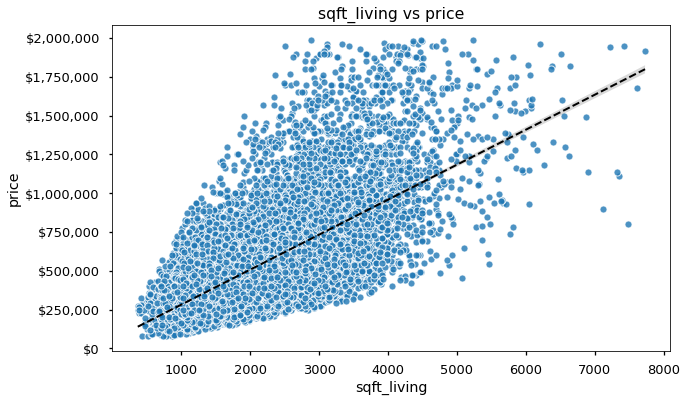

In [ ]:
## Visualize the relationship between sqft_living and price
ax = plot_feature_vs_target(df,x='sqft_living');


### What Our Trendline Tells Us
- Our trendline summarizes the relationship between our feature and our target.
- It is comprised of the: <br>
1) y-intercept (AKA $c$ or $b$ or $\beta_{0}$) indicating the default value of y when X=0.<br>
2) and a slope (AKA $m$ or $\beta$) indicating the relationship between X and y. When X increases by 1, y increases by $m$.

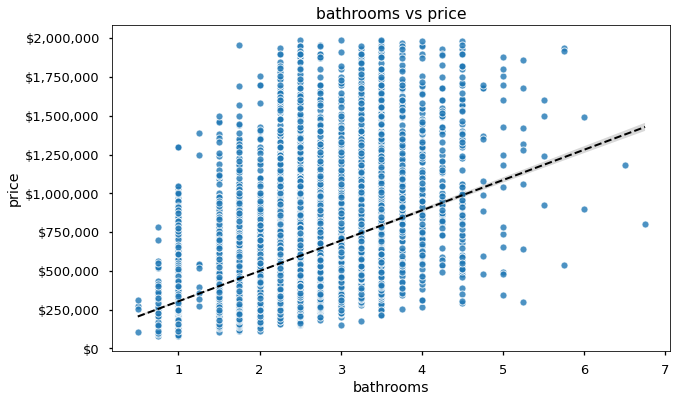

In [ ]:
## Visualize the relationship between bathrooms and price
plot_feature_vs_target(df,x='bathrooms');

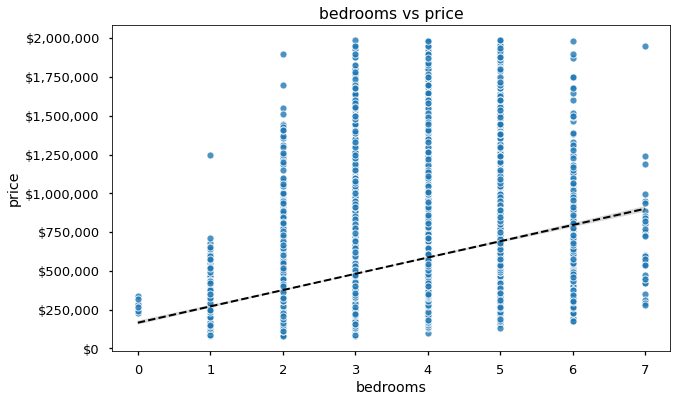

In [ ]:
## Visualize the relationship between bedrooms and price
plot_feature_vs_target(df,x='bedrooms')

>- Now, let's create a Linear Regression model with sci-kit learn to determine the effect of these 3 features!

## 🕹Activity: Predicting House Price with sci-kit learn's `LinearRegression`

In [ ]:
## Create our X & y using bedrooms,bathrooms, sqft-living
use_cols = ['bedrooms','bathrooms','sqft_living']
X = df[use_cols].copy()
y = df['price'].copy()

## Train test split (random-state 321, test_size=0.25)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=321)
X_train

,bedrooms,bathrooms,sqft_living
4178,3,1.7500,2050
16224,3,2.0000,1340
19203,3,2.0000,2660
195,3,2.5000,1690
5859,3,1.0000,1060
...,...,...,...
12102,2,2.0000,1870
5998,4,2.0000,3410
11155,3,2.5000,1570
4276,4,1.7500,1490


In [ ]:
## import LinearRegression from sklearn and fit the model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
## Get our models' R-squared value for the train and test data
print(f"Training R-Squared: {linreg.score(X_train,y_train):.3f}")
print(f"Test R-Squared: {linreg.score(X_test,y_test):.3f}")

Training R-Squared: 0.477
Test R-Squared: 0.459


>- Ok, so what does this tell us?
    - Our model can explain 52% of the variance of house price using just 3 features!

### What Coefficients Did Our Model Find? 

In [ ]:
linreg.coef_

array([-41206.78404009,  13537.01066319,    243.11350944])

In [ ]:

linreg.intercept_

130191.21548501746

In [ ]:
## NOTE: with more time, we would code this together. 
def get_coeffs(reg,X_train):
    """Extracts the coefficients from a scikit-learn LinearRegression or LogisticRegression"""
    coeffs = pd.Series(reg.coef_.flatten(),index=X_train.columns)

    coeffs.loc['intercept'] = reg.intercept_

    return coeffs

- Linear Regression Equation
$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n  $$
which we can simplify to:
$$ \hat y =  \sum_{i=0}^{N} \beta_i x_i  $$

In [ ]:
## Get the coefficents from the model using our new function
coeffs = get_coeffs(linreg,X_train)
coeffs

bedrooms      -41,206.7840
bathrooms      13,537.0107
sqft_living       243.1135
intercept     130,191.2155
dtype: float64

>- **Each coefficient tells us the effect of increasing the values in that column by 1 unit.** 
>- According to our model, we can determine a home's price using the following results:
    - The model assumed a default/starting house price was \$130,191.2155 (the intercept)
    - For each additional bedrooms, subtract      \$-41,206.78
    - For each batrhoom, add \$13,537.01
    - For each square foot of living space, add \$243.11

In [ ]:
## Let's select an example house and see how we calculate price
i = 300
house = X_test.iloc[i]
house

bedrooms          3.0000
bathrooms         2.2500
sqft_living   2,520.0000
Name: 15659, dtype: float64

In [ ]:
## Calculate the home's predicted price using our coefficients
price = house['bedrooms']*coeffs['bedrooms'] + \
        house['bathrooms']*coeffs['bathrooms'] + \
        house['sqft_living']*coeffs['sqft_living'] + coeffs['intercept']

print(f"${price:,.2f}")

$649,675.18


In [ ]:
coeffs.values

array([-41206.78404009,  13537.01066319,    243.11350944, 130191.21548502])

In [ ]:
## What would our model predict for our test house?
linreg.predict(house.values.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([649675.18113678])

In [ ]:
y_test.iloc[i]

420000.0

## Linear Regression Summary
- Linear regression allowed us to predict the exact dollar price of a given home.
- It summarizes the relationship of each feature using coefficients, which are used to calculate the target. 

>-  But what do we do when we want to predict what group a house belongs to instead of an exact price?